<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 8. Фильтрация. Заполнение пропусков. Группировка и индексирование.</b>
       * Очистка и подготовка данных
       * Пробразования данных: слияние, комбинирование и смена размерности
       * Комбинирование и слияние наборов данных

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

#### Пропуски
* Исходные данные редко (почти никогда) не бывает "чистыми"
* Основновными проблемами являются: __пропуски__ и __выбросы__
* Работа с неполными данными может быть организована __по разному__
* От того, как мы будем работать с этим зависит __качество__ последующей обработки
* Существенную помощь в заполнении данных оказывают __статистика__ и __графики__

#### Отчеты
* Отчет - это __"лицо"__ проведенной работы
* (очень) Усредненно отчет по данным состоит из:
    - описания __входных__ данных
    - основной части с __графиками__ и __таблицами__
    - выводов
* Наиболее распространенный элемент отчета - __сводная таблица__
* Для построения таблицы используются функции __группировки__ и __агрегирования (агрегации)__

#### Преобразования
* данные редко "доживают" до конца в неизменном виде, "перетекая" между различными датафреймами, массивами и сериями с сохранением исходного значения
* это происходит за счет __реиндексации__, __слияний__, __разделений__, __преобразование размерности__, __преобразований строк и столбцов__

In [1]:
import numpy as np
#https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import os
from numpy.random import randn
%matplotlib inline

In [2]:
import os
import os.path

## Загрузите данные с kaggle

In [3]:
# https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

In [4]:
#ds = os.path.join("..", "datasets", "Hourly Weather Surface - Brazil", "sudeste.csv")
df = pd.read_csv("sudeste.csv",nrows=10000)

In [8]:
df.head(5)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [9]:
df.shape

(10000, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
wsid    10000 non-null int64
wsnm    10000 non-null object
elvt    10000 non-null float64
lat     10000 non-null float64
lon     10000 non-null float64
inme    10000 non-null object
city    10000 non-null object
prov    10000 non-null object
mdct    10000 non-null object
date    10000 non-null object
yr      10000 non-null int64
mo      10000 non-null int64
da      10000 non-null int64
hr      10000 non-null int64
prcp    1672 non-null float64
stp     10000 non-null float64
smax    10000 non-null float64
smin    10000 non-null float64
gbrd    5831 non-null float64
temp    10000 non-null float64
dewp    10000 non-null float64
tmax    10000 non-null float64
dmax    10000 non-null float64
tmin    10000 non-null float64
dmin    10000 non-null float64
hmdy    10000 non-null float64
hmax    10000 non-null float64
hmin    10000 non-null float64
wdsp    9011 non-null float64
wdct    1000

In [11]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,10000.0,10000.0,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1672.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9011.000000,10000.000000,9809.000000
mean,178.0,237.0,-6.835777e+00,-3.831158e+01,2007.865600,7.120800,15.742400,11.493600,0.718062,851.309510,...,23.745840,17.823710,22.534920,16.595760,59.449500,61.901600,55.683000,1.710132,117.210800,4.253471
std,0.0,0.0,2.122853e-13,2.181475e-12,0.341099,3.627275,8.681865,6.921297,3.436072,337.491237,...,10.377738,7.875183,9.853703,7.466283,29.000603,30.135363,28.604033,1.260583,76.875552,2.873836
min,178.0,237.0,-6.835777e+00,-3.831158e+01,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178.0,237.0,-6.835777e+00,-3.831158e+01,2008.000000,4.000000,8.000000,5.000000,0.000000,982.000000,...,23.100000,17.100000,22.200000,15.300000,46.000000,50.000000,40.000000,0.600000,78.000000,1.900000
50%,178.0,237.0,-6.835777e+00,-3.831158e+01,2008.000000,7.000000,16.000000,11.000000,0.000000,984.700000,...,26.800000,20.300000,25.400000,18.900000,67.000000,70.000000,63.000000,1.600000,112.000000,4.300000
75%,178.0,237.0,-6.835777e+00,-3.831158e+01,2008.000000,11.000000,23.000000,17.000000,0.000000,986.600000,...,30.100000,22.500000,28.400000,21.300000,80.000000,83.000000,76.000000,2.650000,153.000000,6.500000
max,178.0,237.0,-6.835777e+00,-3.831158e+01,2008.000000,12.000000,31.000000,23.000000,53.000000,991.400000,...,37.600000,30.900000,35.900000,29.100000,100.000000,100.000000,100.000000,8.700000,360.000000,21.700000


## <font color=red>ЗАДАНИЕ</font>

Какие поля в describe "бесполезны" и почему?

In [12]:
df.wsid.unique()

array([178])

## <font color=red>ЗАДАНИЕ</font>

Выведите графики средней температуры и средней влажности на метеостанции 383 зависимости от даты либо в двух смежных графиках, либо на одном с правой и левой осями

In [5]:
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [6]:
df['inme'].unique()

array(['A333'], dtype=object)

In [14]:
df.date = pd.to_datetime(df.date)

In [15]:
df.set_index('date', inplace=True)

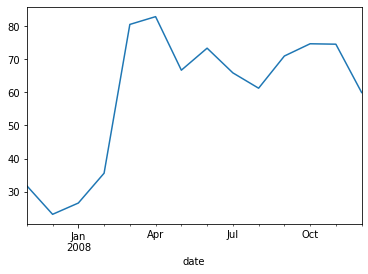

In [17]:
df['hmdy'].resample('M').mean().plot();

In [20]:
df.columns

Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust'],
      dtype='object')

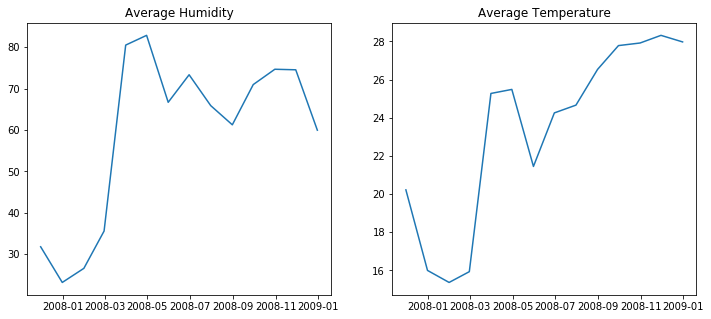

In [25]:
# Ваш код
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].plot(df['hmdy'].resample('M').mean())
axs[0].set_title('Average Humidity')
axs[1].set_title('Average Temperature')
axs[1].plot(df['temp'].resample('M').mean());


## Очистка и подготовка данных

### Работа пропущенных данных

In [26]:
string_data = pd.Series(['дыня', 'тыква', np.nan, 'помидор'])
string_data

0       дыня
1      тыква
2        NaN
3    помидор
dtype: object

In [27]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [28]:
string_data

0       None
1      тыква
2        NaN
3    помидор
dtype: object

### Фильтрация пропущенных данных

In [29]:
from numpy import nan as NA

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [30]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [31]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [32]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [33]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [35]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [36]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [37]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.529769,NaN,NaN
1,0.453083,NaN,NaN
2,0.740863,NaN,0.088998
3,-2.485865,NaN,0.977220
4,0.760326,-0.542310,-2.480521
5,-0.254692,-0.287113,1.712427
6,0.534338,-0.682540,-0.897145


In [38]:
df.dropna()
df.dropna(thresh=2)

,0,1,2
2,0.740863,NaN,0.088998
3,-2.485865,NaN,0.977220
4,0.760326,-0.542310,-2.480521
5,-0.254692,-0.287113,1.712427
6,0.534338,-0.682540,-0.897145


### Заполнение пропущенных данных

In [39]:
df.fillna(0)

,0,1,2
0,-0.529769,0.000000,0.000000
1,0.453083,0.000000,0.000000
2,0.740863,0.000000,0.088998
3,-2.485865,0.000000,0.977220
4,0.760326,-0.542310,-2.480521
5,-0.254692,-0.287113,1.712427
6,0.534338,-0.682540,-0.897145


In [40]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.529769,0.500000,0.000000
1,0.453083,0.500000,0.000000
2,0.740863,0.500000,0.088998
3,-2.485865,0.500000,0.977220
4,0.760326,-0.542310,-2.480521
5,-0.254692,-0.287113,1.712427
6,0.534338,-0.682540,-0.897145


In [41]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.529769,0.000000,0.000000
1,0.453083,0.000000,0.000000
2,0.740863,0.000000,0.088998
3,-2.485865,0.000000,0.977220
4,0.760326,-0.542310,-2.480521
5,-0.254692,-0.287113,1.712427
6,0.534338,-0.682540,-0.897145


In [42]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-2.345043,-0.636381,0.811223
1,-2.054293,1.061762,-0.092846
2,0.734031,NaN,0.036256
3,-1.704038,NaN,0.292706
4,1.931507,NaN,NaN
5,0.621637,NaN,NaN


In [43]:
df.fillna(method='ffill')

,0,1,2
0,-2.345043,-0.636381,0.811223
1,-2.054293,1.061762,-0.092846
2,0.734031,1.061762,0.036256
3,-1.704038,1.061762,0.292706
4,1.931507,1.061762,0.292706
5,0.621637,1.061762,0.292706


In [44]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-2.345043,-0.636381,0.811223
1,-2.054293,1.061762,-0.092846
2,0.734031,1.061762,0.036256
3,-1.704038,1.061762,0.292706
4,1.931507,NaN,0.292706
5,0.621637,NaN,0.292706


In [45]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Преобразования данных

### Удаление дубликатов

In [46]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [47]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [48]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [50]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [51]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Преобразование данных с помощью отображения и функции

In [53]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [54]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [55]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [56]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [57]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Замена значений

In [58]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [59]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [60]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [61]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Переименование индексов осей

In [62]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [63]:
transform = lambda x: x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [64]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [65]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [66]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [67]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Дискретизация и раскладка по "корзинам"

In [68]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

In [ ]:
cats.codes
cats.categories
pd.value_counts(cats)

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

In [ ]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

In [ ]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats
pd.value_counts(cats)

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

### Детектирование и фильтрация выборосов

In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

In [ ]:
col = data[2]
col[np.abs(col) > 3]

In [ ]:
data[(np.abs(data) > 3).any(1)]

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

In [ ]:
np.sign(data).head()

### Перестановка и случайная выборка

In [ ]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

In [ ]:
df
df.take(sampler)

In [ ]:
df.sample(n=3)

In [ ]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

### Вычисление индикативных (знаковых) переменных

In [ ]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

In [ ]:
mnames = ['movie_id', 'title', 'genres']
ml_1m = os.path.join("..", "datasets", "MovieLens", "ml-1m", "movies.dat")
#movies = pd.read_table(ml_1m, sep='::', header=None, names=mnames)
movies = pd.read_csv(ml_1m, sep='::', header=None, names=mnames, engine='python')
movies[:10]

In [ ]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

In [ ]:
genres

In [ ]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [ ]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

In [ ]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

In [ ]:
np.random.seed(12345)
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

### Векторизация строковых операций в pandas

In [ ]:
import re

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

In [ ]:
data.isnull()

In [ ]:
data.str.contains('gmail')

In [ ]:
# Важно! За findall находится re, без него не заработает
import re

pattern = '.*ve'
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches, type(matches)

In [ ]:
matches.str.get(1)
matches.str[0]

In [ ]:
data.str[:5]

## <font color=red>ЗАДАНИЕ</font>

* Какие  поля требуется заполнять
* Почему?
* Как Вы их будете заполнять?


In [ ]:
# Ваш код


## Пробразования данных: слияние, комбинирование и смена размерности

### Иерархическая индексация

In [ ]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

In [ ]:
data.index

In [ ]:
data['b']
data['b':'c']
data.loc[['b', 'd']]

In [ ]:
data.loc[:, 2]

In [ ]:
data.unstack()

In [ ]:
data.unstack().stack()

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame['Ohio']

In [ ]:
pd.MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']], names=['state', 'color'])

### Переупорядочивание и сортировка уровней

In [ ]:
frame.swaplevel('key1', 'key2')

In [ ]:
frame.swaplevel('key1', 'key2')

In [ ]:
frame.sort_index(level=1)
frame.swaplevel(0, 1).sort_index(level=0)

### Суммарная статистика по индексу

In [ ]:
frame.sum(level='key2')
frame.sum(level='color', axis=1)

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

In [ ]:
frame2 = frame.set_index(['c', 'd'])
frame2

In [ ]:
frame.set_index(['c', 'd'], drop=False)

In [ ]:
frame2.reset_index()

## Комбинирование и слияние наборов данных

### Слияние в стиле реляционной СУБД

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2)

In [ ]:
pd.merge(df1, df2, on='key')

In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

In [ ]:
pd.merge(df1, df2, how='outer')

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, on='key', how='left')

In [ ]:
pd.merge(df1, df2, how='inner')

In [ ]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

In [ ]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

### Слияние по индексу

In [ ]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1

In [ ]:
right1

In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True)

In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

In [ ]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth

In [ ]:
righth

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2

In [ ]:
right2

In [ ]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

In [ ]:
left2.join(right2, how='outer')

In [ ]:
left1.join(right1, on='key')

In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another

In [ ]:
left2.join([right2, another])

In [ ]:
#left2.join([right2, another], how='outer')
left2.join([right2, another], how='outer', sort=True)

### Объединение вдоль осей

In [ ]:
arr = np.arange(12).reshape((3, 4))
arr


In [ ]:
np.concatenate([arr, arr], axis=1)

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])

In [ ]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [ ]:
s3 = pd.Series([5, 6], index=['f', 'g'])

In [ ]:
pd.concat([s1, s2, s3])

In [ ]:
pd.concat([s1, s2, s3], axis=1, sort=True)

In [ ]:
s4 = pd.concat([s1, s3])
s4

In [ ]:
pd.concat([s1, s4], axis=1, sort=True)

In [ ]:
pd.concat([s1, s4], axis=1, join='inner', sort=True)

In [ ]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']], sort=True)

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

In [ ]:
result.unstack()

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'], sort=True)

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], sort=True)

In [ ]:
pd.concat({'level1': df1, 'level2': df2}, axis=1, sort=True)

In [ ]:
#pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
#          names=['upper', 'lower'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'], sort=True)

In [ ]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], ignore_index=True, sort=True)

### Комбинирование данных с перекрытием

In [ ]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a

In [ ]:
b

In [ ]:
np.where(pd.isnull(a), b, a)

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1

In [ ]:
df2

In [ ]:
df1.combine_first(df2)

## Изменение размерностей и "повороты"

### Иерархическое индексирование и reshaping

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

In [ ]:
result = data.stack()
result

In [ ]:
result.unstack()

In [ ]:
result.unstack(0)
result.unstack('state')

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [ ]:
data2

In [ ]:
data2.unstack()

In [ ]:
data2.unstack()

In [ ]:
data2.unstack().stack()

In [ ]:
data2.unstack().stack(dropna=False)

In [ ]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### Поворот из "длинного" в "широкий" формат

In [ ]:
data = pd.read_csv('macrodata.csv')
data.head()
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [ ]:
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

### Поворот из "широкого" в "длинный" формат

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

In [ ]:
melted = pd.melt(df, ['key'])
melted

In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

In [ ]:
reshaped.reset_index()

In [ ]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

In [ ]:
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

## Агрегирование данных и групповые операции

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

In [ ]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
grouped.mean()

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

In [ ]:
means.unstack()

In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

In [ ]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby(['key1', 'key2']).size()

### Итерация по группам|

In [ ]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

In [ ]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

In [ ]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

In [ ]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [ ]:
for dtype, group in grouped:
    print(dtype)
    print(group)

### Выбор колонок или их подмножества

```python

df.groupby('key1')['data1'] 
df.groupby('key1')[['data2']]

является более удобной формой записи (syntactit sugar) для

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])
```

In [ ]:
df.groupby(['key1', 'key2'])[['data2']].mean()

In [ ]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

### Группировка по словарям и сериям

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

In [ ]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [ ]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

In [ ]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

### Группировка с функциями

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Группировка по уровням индекса

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

### Агрегирование данных

In [ ]:
df
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

In [ ]:
grouped.describe()

### Применение функции к столбцу и применение нескольких функций

In [ ]:
tips = pd.read_csv('tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

In [ ]:
grouped = tips.groupby(['day', 'smoker'])

In [ ]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

In [ ]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

In [ ]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

In [ ]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

In [ ]:
result['tip_pct']

In [ ]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

In [ ]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

### Возврат агрегированных двнных без строчных индексов

In [ ]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

## Применение: разделить - применить - скомбинировать

In [ ]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

In [ ]:

result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

### Подавление групповых ключей

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

### Анализ по квартилям и козинам

In [ ]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Пример: заполнение отсутствущих значений с значениями, определенными для группы

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

### Пример: случайная выборка и перестановки

In [ ]:

# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [ ]:
deck[:13]

In [ ]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Пример: взвешенное по группе среднее и корреляция

In [ ]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

In [ ]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [ ]:
rets = close_px.pct_change().dropna()

In [ ]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

In [ ]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Пример: линейная регрессия по группам

In [ ]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

### Сводные таблицы и таблицы с разделением полей табуляцией (crosstab)

In [ ]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
#data = pd.read_table(StringIO(data), sep='\s+')
data = pd.read_csv(StringIO(data), sep='\s+')


In [ ]:
data

In [ ]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## По следующим занятиям

### 9-е занятие: 
* тестовая EDA 
* коллоквикум по EDA на учебном примере с kaggle

### Для подготовки: 
* Внимательно пересмотреть материал это и 2 предыдущих занятия
* Посмотреть dataset и kernels для Титаника на kaggle

## Экзаменационные вопросы:
* Очистка и подготовка данных
* Пробразования данных: слияние, комбинирование и смена размерности
* Комбинирование и слияние наборов данных
* Подход "разделить - применить - скомбинировать"